In [12]:
from tifffile import imread, imwrite
import matplotlib.pyplot as plt
import numpy as np

In [13]:
image = imread("./data/FISH_RGB.TIF")[:500, :500]
print(image.shape)

(500, 500, 3)


In [14]:
from CellPatchExtraction.src.extraction import extract_patches
from cellpose.models import CellposeModel
from cellplot.patches import gridPlot
from cellplot.segmentation import rand_col_seg
import torch

return_dict = extract_patches(
    image, 
    "CP_TU", 
    cellpose_kwargs={"diameter": 50}, 
    min_size=10,
    max_size=10000,
    patch_size=128, 
    nuclear_channel=2,
    device=torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu"),
    use_surrounding=True,
    exclude_edges=False,
    return_all=True)

print(return_dict.keys())

dict_keys(['image_patches', 'mask_patches', 'surrounding_mask_patches', 'background_mask_patches', 'coordinates', 'segmentation'])


(-0.5, 499.5, 499.5, -0.5)

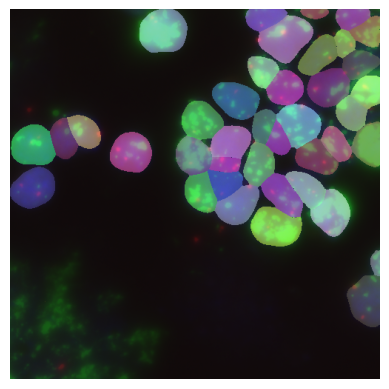

In [15]:
plt.imshow(image)
plt.imshow(rand_col_seg(return_dict["segmentation"]), alpha=0.5)
plt.axis("off")

Detected 40 cells


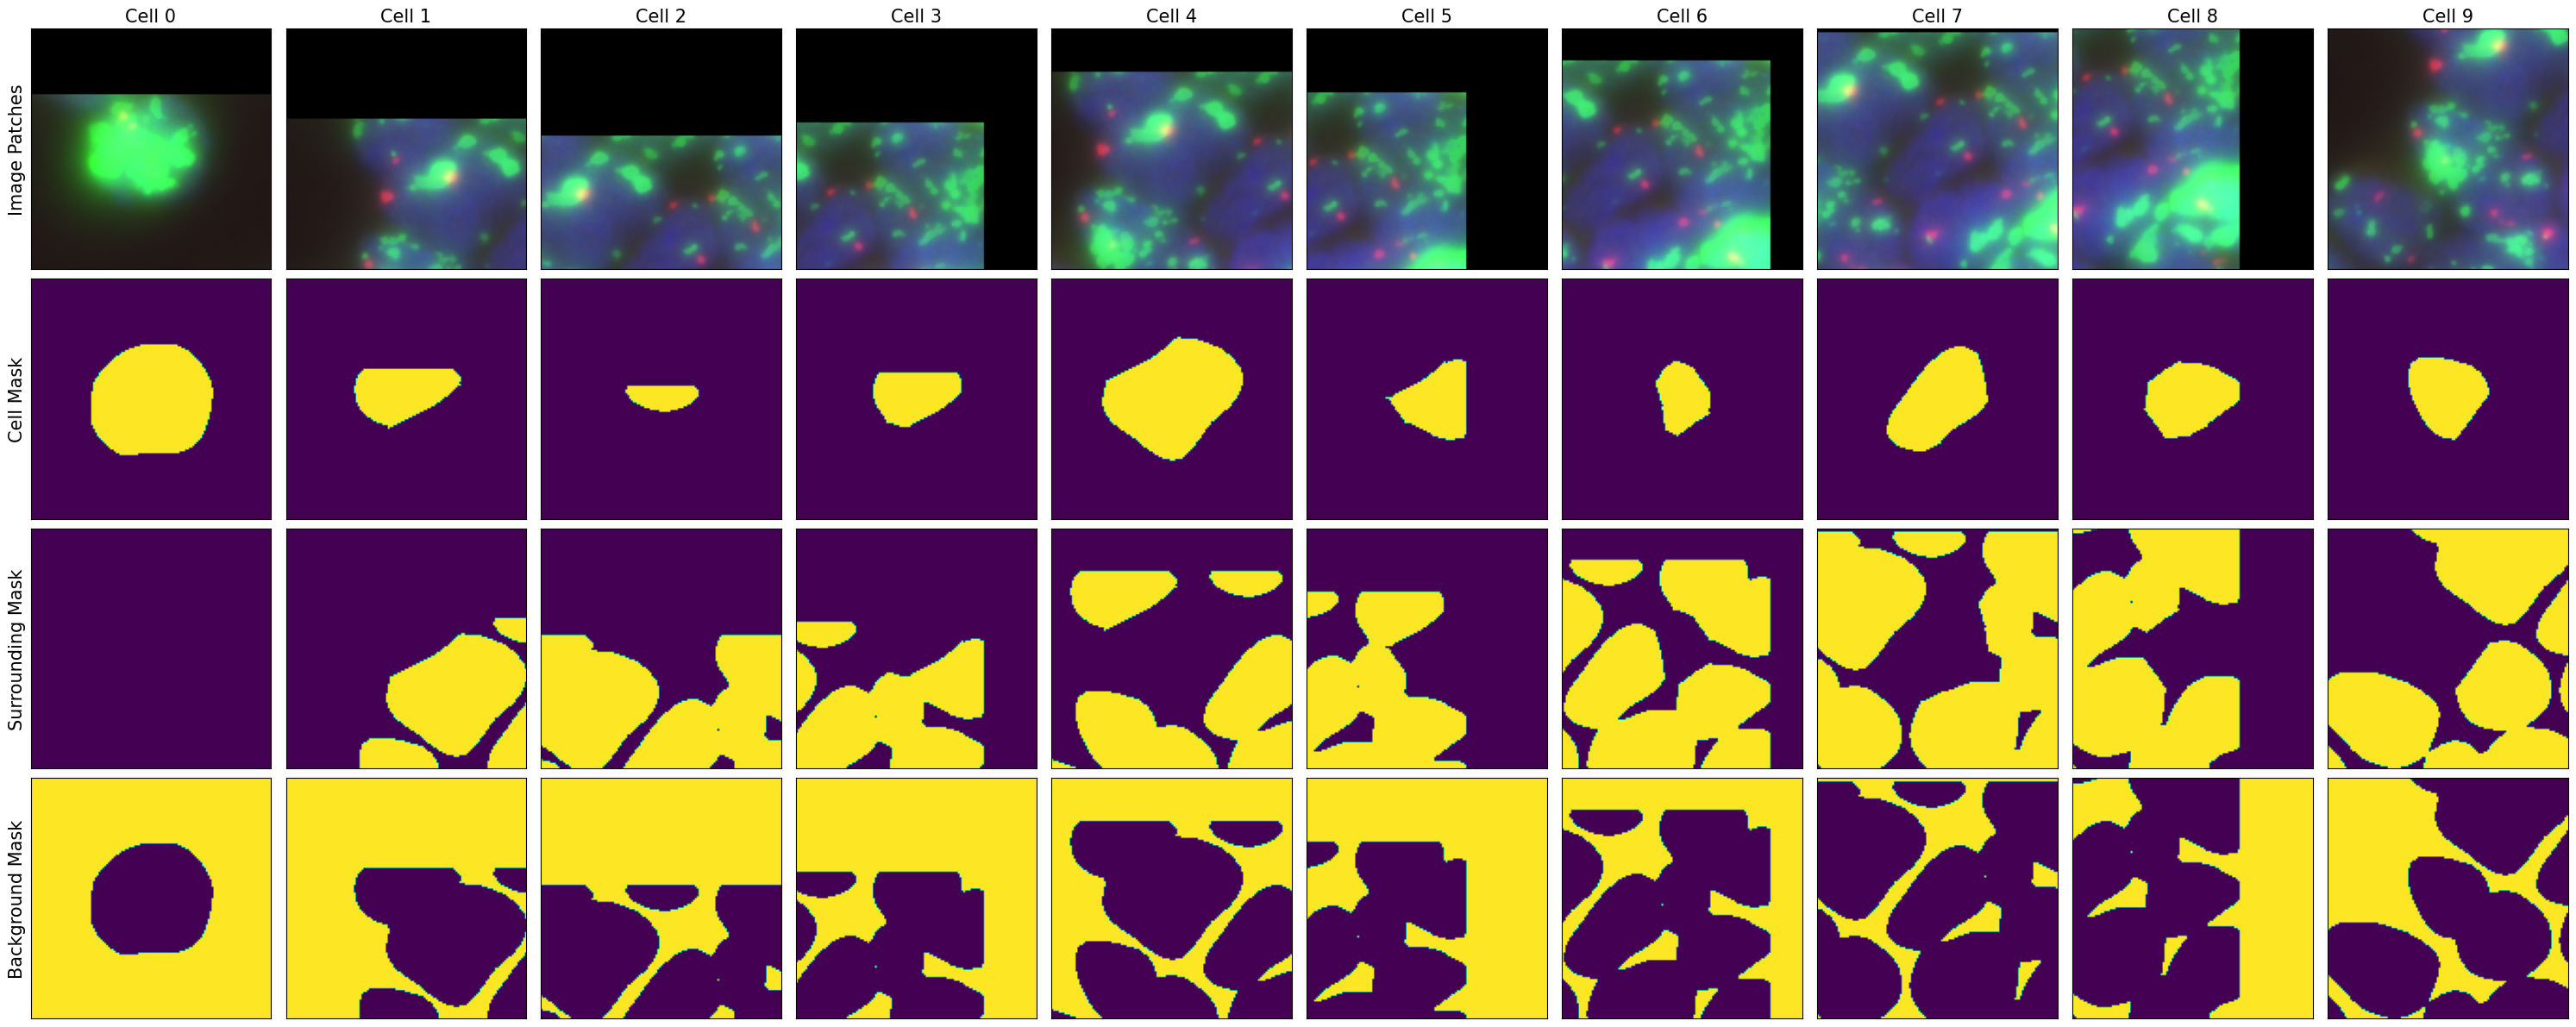

In [37]:
n_patches = len(return_dict["image_patches"])
print(f"Detected {n_patches} cells")

fig, ax = plt.subplots(4, min(n_patches, 10), figsize=(min(n_patches, 10)*3, 12))

for i in range( min(n_patches, 10)):  
    
    ax[0, i].set_title(f"Cell {i}", fontsize=15)
    ax[0, i].imshow(return_dict["image_patches"][i])
    ax[1, i].imshow(return_dict["mask_patches"][i])
    ax[2, i].imshow(return_dict["surrounding_mask_patches"][i])
    ax[3, i].imshow(return_dict["background_mask_patches"][i])
    
    if i == 0:
        
        ax[0, i].set_ylabel("Image Patches", fontsize=15)
        ax[1, i].set_ylabel("Cell Mask", fontsize=15)
        ax[2, i].set_ylabel("Surrounding Mask", fontsize=15)
        ax[3, i].set_ylabel("Background Mask", fontsize=15)
    
    for j in range(4):
        ax[j, i].yaxis.set_ticks([])
        ax[j, i].xaxis.set_ticks([])

plt.tight_layout()
plt.show()

# gridPlot(return_dict["image_patches"], channels_to_show=[0, 1, 2], layout="auto", grid_size=(4, 4))
# gridPlot(return_dict["mask_patches"], layout="auto", grid_size=(4, 4))
# gridPlot(return_dict["surrounding_mask_patches"], layout="auto", grid_size=(4, 4))
# gridPlot(return_dict["background_mask_patches"], layout="auto", grid_size=(4, 4))